# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
# Scraping
from splinter import Browser
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

# parsing
from bs4 import BeautifulSoup

# data science
import pandas as pd
import matplotlib.pyplot as plt

##### *** NOTE: 2 different methods are being used for demonstration purposes. Either method will accomplish the data extraction
Method 1: Using Pandas HTML Table parsing <br />
Method 2: Using Selenium

### Method 1: Using Pandas

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
# Save the HTML from the browser
html = browser.html

# Create a BeautifulSoup object from the HTML
# According to these web pages, performance is better on lxml: 
#   https://stackoverflow.com/questions/25714417/beautiful-soup-and-table-scraping-lxml-vs-html-parser
#   https://www.crummy.com/software/BeautifulSoup/bs4/doc/#installing-a-parser
soup = BeautifulSoup(html, 'lxml')

In [5]:
# Extract all rows of data
mars_data_table = soup.find('table', {'class': 'table'})

In [6]:
# Pandas HTML Table Parsing
dfs = pd.read_html(str(mars_data_table))
df_pandas_method = dfs[0]

print(df_pandas_method.info())
df_pandas_method.head()

C:\Users\carlo\AppData\Local\Temp\ipykernel_30944\1759851447.py:2: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  dfs = pd.read_html(str(mars_data_table))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1867 non-null   int64  
 1   terrestrial_date  1867 non-null   object 
 2   sol               1867 non-null   int64  
 3   ls                1867 non-null   int64  
 4   month             1867 non-null   int64  
 5   min_temp          1867 non-null   float64
 6   pressure          1867 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 102.2+ KB
None


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [7]:
# Once the data is in a DataFrame, we can close the browser
browser.quit()

In [8]:
# Convert terrestrial date to a datetime object
df_pandas_method['terrestrial_date'] = pd.to_datetime(df_pandas_method['terrestrial_date'])

df_pandas_method.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

### Method 1: Using Selenium

In [9]:
# To demonstrate the second method, we need to re-open the browser using Selenium
# This time we will use the ChromeDriverManager to get the path to the ChromeDriver
# This is a more robust way to open the browser
service = Service(ChromeDriverManager().install())
browser = Browser('chrome', service=service)

# Visit the website
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

# Create a Beautiful Soup Object
# Save the HTML from the browser
html = browser.html

# Create a BeautifulSoup object from the HTML
# According to these web pages, performance is better on lxml:
#   https://stackoverflow.com/questions/25714417/beautiful-soup-and-table-scraping-lxml-vs-html-parser
#   https://www.crummy.com/software/BeautifulSoup/bs4/doc/#installing-a-parser

soup = BeautifulSoup(html, 'lxml')

# Extract all rows of data
mars_data_table = soup.find('table', {'class': 'table'})

In [10]:
# Create an empty list
mars_data_list = []

# Get all the rows of the table
rows = mars_data_table.find_all('tr')

# Loop through the scraped data to create a list of rows. Skip the first row as it contains the headers
for row in rows[1:]:
    # Get all the columns in each row
    columns = row.find_all('td')
    # Create a dictionary of the data
    mars_data = {
        'id': columns[0].text.strip(),
        'terrestrial_date': columns[1].text.strip(),
        'sol': columns[2].text.strip(),
        'ls': columns[3].text.strip(),
        'month': columns[4].text.strip(),
        'min_temp': columns[5].text.strip(),
        'pressure': columns[6].text.strip()
    }
    # Append the dictionary to the list
    mars_data_list.append(mars_data)

In [11]:
# Once the data is in a list, we can close the browser
browser.quit()

In [12]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df_dictionary_method = pd.DataFrame(mars_data_list)
df_dictionary_method.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [13]:
# Confirm DataFrame was created successfully
df_dictionary_method.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [14]:
# Examine data type of each column
df_dictionary_method.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [15]:
# Change data types for data analysis
df_dictionary_method.id = df_dictionary_method.id.astype(int)
df_dictionary_method.terrestrial_date = pd.to_datetime(df_dictionary_method.terrestrial_date)
df_dictionary_method.sol = df_dictionary_method.sol.astype(int)
df_dictionary_method.ls = df_dictionary_method.ls.astype(int)
df_dictionary_method.month = df_dictionary_method.month.astype(int)
df_dictionary_method.min_temp = df_dictionary_method.min_temp.astype(float)
df_dictionary_method.pressure = df_dictionary_method.pressure.astype(float)

In [16]:
# Confirm type changes were successful by examining data types again
df_dictionary_method.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int32         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int32         
 3   ls                1867 non-null   int32         
 4   month             1867 non-null   int32         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(4)
memory usage: 73.1 KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [17]:
# 1. How many months are there on Mars?
df_dictionary_method.month.value_counts().sort_index()

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64

In [18]:
# 2. How many Martian days' worth of data are there?
df_dictionary_method.sol.nunique()

1867

In [19]:
# 3. What is the average low temperature by month?
df_dictionary_method.groupby('month').min_temp.mean()

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

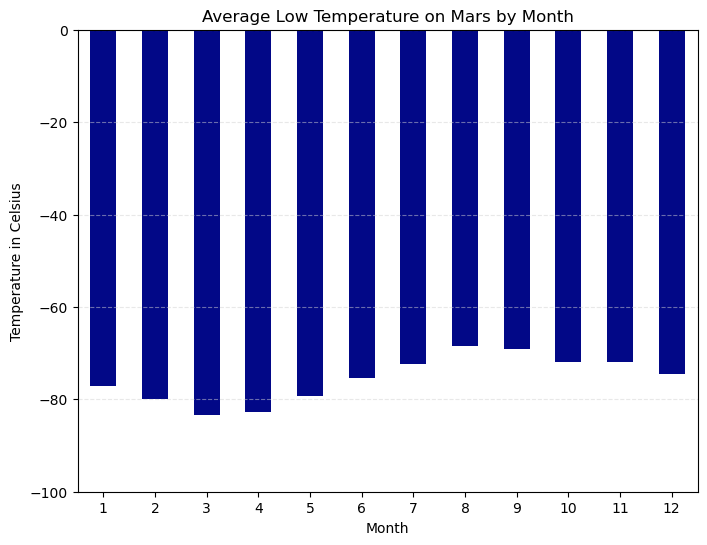

In [20]:
# Plot the average temperature by month
avg_temp_by_month = df_dictionary_method.groupby('month').min_temp.mean()

avg_temp_by_month.plot(kind='bar', color='#020887', figsize=(8, 6), rot=0)

plt.title('Average Low Temperature on Mars by Month')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.ylim(-100, 0)
plt.grid(axis='y', color='lightgray', linestyle='--', alpha=0.5)

plt.show()

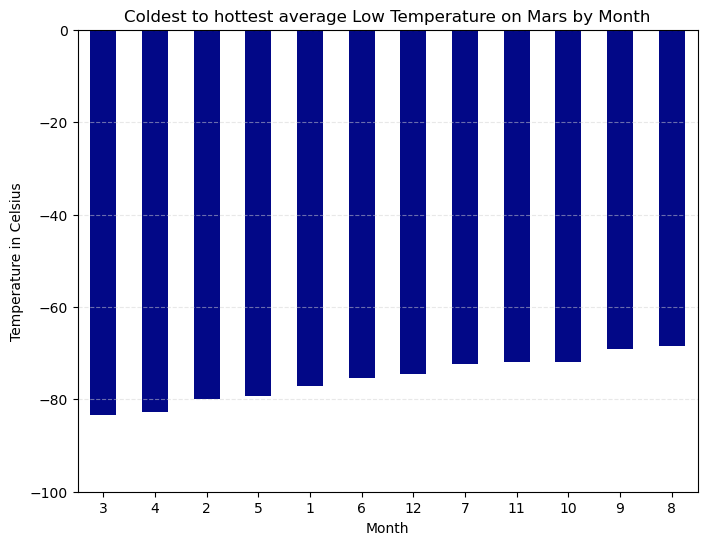

In [21]:
# Identify the coldest and hottest months in Curiosity's location
avg_temp_by_month = df_dictionary_method.groupby('month').min_temp.mean()
avg_temp_by_month = avg_temp_by_month.sort_values()

avg_temp_by_month.plot(kind='bar', color='#020887', figsize=(8, 6), rot=0)

plt.title('Coldest to hottest average Low Temperature on Mars by Month')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.ylim(-100, 0)
plt.grid(axis='y', color='lightgray', linestyle='--', alpha=0.5)

plt.show()

In [22]:
# 4. Average pressure by Martian month
df_dictionary_method.groupby('month').pressure.mean()

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

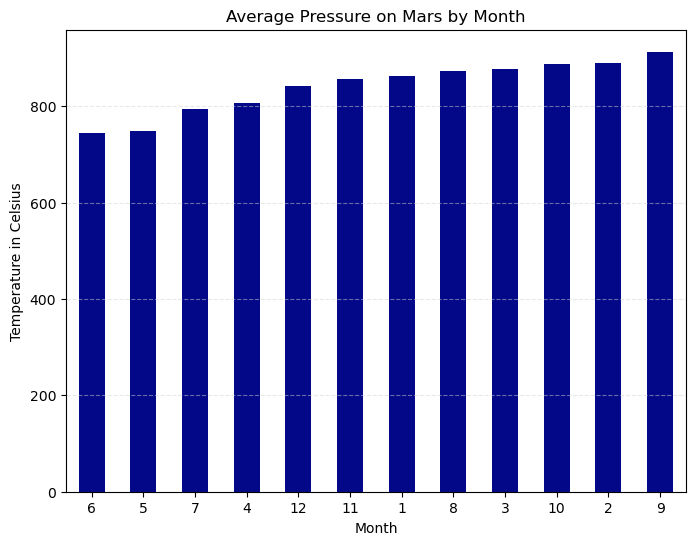

In [23]:
# Plot the average pressure by month in ascending order
avg_pressure_by_month = df_dictionary_method.groupby('month').pressure.mean()
avg_pressure_by_month = avg_pressure_by_month.sort_values()

avg_pressure_by_month.plot(kind='bar', color='#020887', figsize=(8, 6), rot=0)

plt.title('Average Pressure on Mars by Month')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.grid(axis='y', color='lightgray', linestyle='--', alpha=0.5)

plt.show()

In [24]:
# Find the number of Martian days in an earth year
mask = df_dictionary_method.terrestrial_date.dt.year == 2013
earth_year = df_dictionary_method[mask]

earth_year.info()


<class 'pandas.core.frame.DataFrame'>
Index: 290 entries, 130 to 419
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                290 non-null    int32         
 1   terrestrial_date  290 non-null    datetime64[ns]
 2   sol               290 non-null    int32         
 3   ls                290 non-null    int32         
 4   month             290 non-null    int32         
 5   min_temp          290 non-null    float64       
 6   pressure          290 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int32(4)
memory usage: 13.6 KB


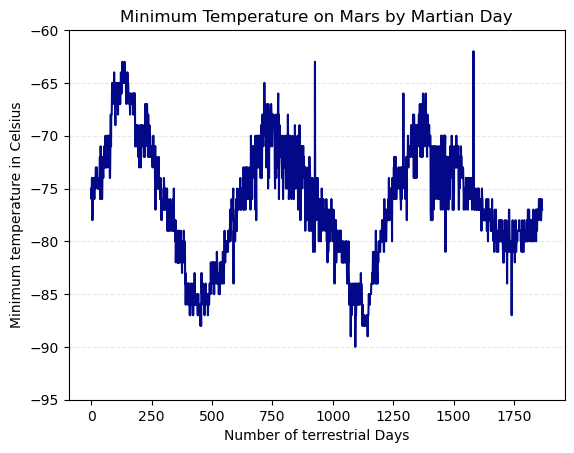

In [25]:
# 5. How many terrestrial (earth) days are there in a Martian year?
total_days = range(len(df_dictionary_method))

plt.plot(total_days, df_dictionary_method['min_temp'], color='#020887')

plt.title('Minimum Temperature on Mars by Martian Day')
plt.xlabel('Number of terrestrial Days')
plt.ylabel('Minimum temperature in Celsius')
plt.ylim(-95, -60)
plt.grid(axis='y', color='lightgray', linestyle='--', alpha=0.5)

plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [26]:
# Write the data to a CSV
df_dictionary_method.to_csv('output_files/mars_data.csv', index=False)
